# 02. PyTorch Neural Network Classification

## What is a classification problem?

A [classification problem](https://en.wikipedia.org/wiki/Statistical_classification) involves predicting whether something is one thing or another.

For example, you might want to:

| Problem type | What is it? | Example |
| ----- | ----- | ----- |
| **Binary classification** | Target can be one of two options, e.g. yes or no | Predict whether or not someone has heart disease based on their health parameters. |
| **Multi-class classification** | Target can be one of more than two options | Decide whether a photo is of food, a person or a dog. |
| **Multi-label classification** | Target can be assigned more than one option | Predict what categories should be assigned to a Wikipedia article (e.g. mathematics, science & philosophy). |

<div align="center">
<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/02-different-classification-problems.png" alt="various different classification in machine learning such as binary classification, multiclass classification and multilabel classification" width=900/>
</div>
    
Classification, along with regression (predicting a number, covered in [notebook 01](https://www.learnpytorch.io/01_pytorch_workflow/)) is one of the most common types of machine learning problems.

In this notebook, we're going to work through a couple of different classification problems with PyTorch. 

In other words, taking a set of inputs and predicting what class those set of inputs belong to.

## What we're going to cover

In this notebook we're going to reiterate over the PyTorch workflow we covered in [01. PyTorch Workflow](https://www.learnpytorch.io/02_pytorch_classification/).

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01_a_pytorch_workflow.png" alt="a pytorch workflow flowchart" width=900/>

Except instead of trying to predict a straight line (predicting a number, also called a regression problem), we'll be working on a **classification problem**.

Specifically, we're going to cover:

| **Topic** | **Contents** |
| ----- | ----- |
| **0. Architecture of a classification neural network** | Neural networks can come in almost any shape or size, but they typically follow a similar floor plan. |
| **1. Getting binary classification data ready** | Data can be almost anything but to get started we're going to create a simple binary classification dataset. |
| **2. Building a PyTorch classification model** | Here we'll create a model to learn patterns in the data, we'll also choose a **loss function**, **optimizer** and build a **training loop** specific to classification. | 
| **3. Fitting the model to data (training)** | We've got data and a model, now let's let the model (try to) find patterns in the (**training**) data. |
| **4. Making predictions and evaluating a model (inference)** | Our model's found patterns in the data, let's compare its findings to the actual (**testing**) data. |
| **5. Improving a model (from a model perspective)** | We've trained and evaluated a model but it's not working, let's try a few things to improve it. |
| **6. Non-linearity** | So far our model has only had the ability to model straight lines, what about non-linear (non-straight) lines? |
| **7. Replicating non-linear functions** | We used **non-linear functions** to help model non-linear data, but what do these look like? |
| **8. Putting it all together with multi-class classification** | Let's put everything we've done so far for binary classification together with a multi-class classification problem. |


## 0. Architecture of a classification neural network

Before we get into writing code, let's look at the general architecture of a classification neural network.

| **Hyperparameter** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| **Input layer shape** (`in_features`) | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| **Hidden layer(s)** | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| **Neurons per hidden layer** | Problem specific, generally 10 to 512 | Same as binary classification |
| **Output layer shape** (`out_features`) | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| **Hidden layer activation** | Usually [ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU) (rectified linear unit) but [can be many others](https://en.wikipedia.org/wiki/Activation_function#Table_of_activation_functions) | Same as binary classification |
| **Output activation** | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) ([`torch.sigmoid`](https://pytorch.org/docs/stable/generated/torch.sigmoid.html) in PyTorch)| [Softmax](https://en.wikipedia.org/wiki/Softmax_function) ([`torch.softmax`](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html) in PyTorch) |
| **Loss function** | [Binary crossentropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`torch.nn.BCELoss`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) in PyTorch) | Cross entropy ([`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) in PyTorch) |
| **Optimizer** | [SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) (stochastic gradient descent), [Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) (see [`torch.optim`](https://pytorch.org/docs/stable/optim.html) for more options) | Same as binary classification |

Of course, this ingredient list of classification neural network components will vary depending on the problem you're working on.

But it's more than enough to get started.

We're going to get hands-on with this setup throughout this notebook.

## 1. Make classification data and get it ready
Let's begin by making some data.

We'll use the `make_circles()` method from Scikit-Learn to generate two circles with different coloured dots.

In [4]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import sklearn

This line imports the `scikit-learn` library, which is a popular machine learning library in Python. It provides tools for creating datasets, building models, and evaluating them.

---

### 2. Generating Synthetic Data with `make_circles`


In [6]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

- **`make_circles`**: This function generates a synthetic dataset of points arranged in two concentric circles. It is commonly used for binary classification problems.
- **`n_samples=1000`**: Specifies the total number of data points (samples) to generate.
- **`noise=0.03`**: Adds a small amount of random noise to the data points to make the dataset more realistic and challenging.
- **`random_state=42`**: Ensures reproducibility by setting a fixed seed for random number generation.

The function returns:
- `X`: A 2D array of shape `(n_samples, 2)` containing the coordinates of the data points.
- `y`: A 1D array of shape `(n_samples,)` containing the labels (0 or 1) for each data point.

---

### 3. Checking the Length of the Data


In [7]:
len(X), len(y)

(1000, 1000)

This line checks the number of samples in `X` (features) and `y` (labels). Since we specified `n_samples=1000`, both `X` and `y` should have 1000 elements.

---

### 4. Inspecting the First Few Data Points


In [8]:
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]


- **`X[:5]`**: Displays the first 5 rows of the feature array `X`. Each row contains two values representing the x and y coordinates of a data point.
- **`y[:5]`**: Displays the first 5 labels in the array `y`. Each label is either `0` or `1`, indicating which circle the corresponding data point belongs to.

The output helps us understand the structure of the dataset:
- `X` contains the coordinates of the points.
- `y` contains the labels (0 or 1) for binary classification.

---

In [9]:
# make dataframe of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0], "X2": X[:, 1], "label": y})
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


It looks like each pair of `X` features (`X1` and `X2`) has a label (`y`) value of either 0 or 1.

This tells us that our problem is binary classification since there's only two options (0 or 1).

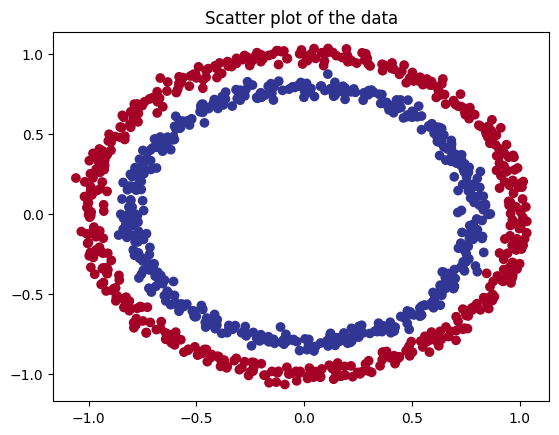

In [10]:
import matplotlib.pyplot as plt
# Plot the data
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.title("Scatter plot of the data")
plt.show()

Alrighty, looks like we've got a problem to solve.

Let's find out how we could build a PyTorch neural network to classify dots into red (0) or blue (1).

**Note:** This dataset is often what's considered a toy problem (a problem that's used to try and test things out on) in machine learning.

But it represents the major key of classification, you have some kind of data represented as numerical values and you'd like to build a model that's able to classify it, in our case, separate it into red or blue dots.

### 1.1 Input and output shapes
One of the most common errors in deep learning is shape errors.

Mismatching the shapes of tensors and tensor operations will result in errors in your models.

We're going to see plenty of these throughout the course.

And there's no surefire way to make sure they won't happen, they will.

What you can do instead is continually familiarize yourself with the shape of the data you're working with.

I like referring to it as input and output shapes.

Ask yourself:

"What shapes are my inputs and what shapes are my outputs?"

Let's find out.

In [11]:
X.shape, y.shape

((1000, 2), (1000,))

In [12]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]], shape=(1000, 2))

In [13]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

Looks like we've got a match on the first dimension of each.

There's 1000 `X` and 1000 `y`.

But what's the second dimension on `X`?

It often helps to view the values and shapes of a single sample (features and labels).

Doing so will help you understand what input and output shapes you'd be expecting from your model.

In [14]:
# view the first example if features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


In the context of linear algebra and machine learning, the reason `y` has no shape (or appears as a 1D array) is because it represents **scalar values** (labels) rather than vectors or matrices. Let me explain this step by step:

---

##### 1. **What is `y`?**
`y` is the **label array** for the dataset. It contains the target values for each data point in `X`. In this case, `y` is a 1D array of binary values (0 or 1), where each value corresponds to the class of a data point in `X`.

For example:
- If `X[i]` is the feature vector for the `i-th` data point, then `y[i]` is the label (either 0 or 1) for that data point.

---

##### 2. **Shape of `y`**
In linear algebra:
- A **vector** is a 1D array of numbers, which can be thought of as a column or row in a matrix.
- A **scalar** is a single number.

`y` is a **1D array** (or vector) of length `n_samples` (1000 in this case). It does not have a second dimension because each label is a scalar value, not a vector.

For example:
- `y = [0, 1, 0, 1, 0]` is a 1D array (vector) of shape `(5,)`.
- It does not have a second dimension because each label is a single number, not a multi-dimensional object.

---

##### 3. **Why does `y` have no shape like `X`?**
`X` is a **2D array** (or matrix) because it contains feature vectors for each data point. Each row in `X` is a vector of features (e.g., `[x1, x2]` for 2D data). Therefore, `X` has a shape of `(n_samples, n_features)`.

In contrast:
- `y` is a **1D array** because it only contains one scalar value (the label) for each data point. It does not need a second dimension.

Mathematically:
- `X` is a matrix of size `n_samples × n_features`.
- `y` is a vector of size `n_samples`.

##### 4. **Why is this important?**
The distinction between `X` and `y` is crucial for machine learning:
- `X` is the **input** to the model, containing multiple features for each data point.
- `y` is the **output** (or target), containing a single label for each data point.

When training a model, the algorithm uses the rows of `X` (feature vectors) to predict the corresponding values in `y` (labels).


### 1.2 Turn data into tensors and create train and test splits
We've investigated the input and output shapes of our data, now let's prepare it for being used with PyTorch and for modelling.

Specifically, we'll need to:

- Turn our data into tensors (right now our data is in NumPy arrays and PyTorch prefers to work with PyTorch tensors).
- Split our data into training and test sets (we'll train a model on the training set to learn the patterns between X and y and then evaluate those learned patterns on the test dataset).




##### **Why Do We Need to Convert Data into Tensors?**

In deep learning workflows, converting data into PyTorch tensors is essential for the following reasons:
- **NumPy arrays** are great for general-purpose numerical computations but lack GPU support and autograd capabilities.
- **PyTorch tensors** are specifically designed for deep learning, offering GPU acceleration, autograd, and seamless integration with PyTorch models.
- Converting data into tensors is necessary to leverage PyTorch's deep learning capabilities, including training models and performing efficient computations.

In [15]:
import torch

In [16]:
# turn the data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [21]:
# View the first five samples
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [20]:
X.dtype, y.dtype

(torch.float32, torch.float32)

Now our data is in tensor format, let's split it into training and test sets.

To do so, let's use the helpful function `train_test_split()` from Scikit-Learn.

We'll use `test_size=0.2` (80% training, 20% testing) and because the split happens randomly across the data, let's use `random_state=42` so the split is reproducible.

In [23]:
import sklearn
# split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=42
                                                    )

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

we've now got 800 training samples and 200 testing samples.

### 2. Building a model
We've got some data ready, now it's time to build a model.

We'll break it down into a few parts.

- Setting up device agnostic code (so our model can run on CPU or GPU if it's available).
- Constructing a model by subclassing `nn.Module`.
- Defining a loss function and optimizer.
- Creating a training loop (this'll be in the next section).
The good news is we've been through all of the above steps before in notebook 01.

Except now we'll be adjusting them so they work with a classification dataset.

Let's start by importing PyTorch and `torch.nn` as well as setting up device agnostic code.

In [25]:
# import pytorch and nn
import torch
from torch import nn

# set up device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [27]:
X_train, y_train

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         ...,
         [ 0.0157, -1.0300],
         [ 1.0110,  0.1680],
         [ 0.5578, -0.5709]]),
 tensor([1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
         0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
         1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1.,
         1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
         1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
         0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
         1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
         0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,


Excellent, now `device` is setup, we can use it for any data or models we create and PyTorch will handle it on the CPU (default) or GPU if it's available.

How about we create a model?

We'll want a model capable of handling our `X` data as inputs and producing something in the shape of our `y` data as outputs.

In other words, given `X` (features) we want our model to predict `y` (label).

This setup where you have features and labels is referred to as supervised learning. Because your data is telling your model what the outputs should be given a certain input.

To create such a model it'll need to handle the input and output shapes of `X` and `y`.

Remember how I said input and output shapes are important? Here we'll see why.

Let's create a model class that:

- Subclasses `nn.Module` (almost all PyTorch models are subclasses of `nn.Module`).
- Creates 2 `nn.Linear` layers in the constructor capable of handling the input and output shapes of `X` and `y`.
- Defines a `forward()` method containing the forward pass computation of the model.
- Instantiates the model class and sends it to the target `device`

In [34]:
# construct a model that subclasses nn.Moule
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling X and y input and output shapes
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features (X), produces 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features, produces 1 feature (y)
    # 3. Create a forward method that takes in data and passes it through the layers
    def forward(self, x):
        # Return the output of layer_2, a single feature, the same shape as y
        return self.layer_2(self.layer_1(x)) # computation goes through layer_1 first then the output of layer_1 goes through layer_2
# 4. Create an instance of the model and send it to target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

Here’s a detailed explanation of the code, step by step:

---

### **1. Subclassing `nn.Module`**


In [32]:
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()

- **`nn.Module`**: This is the base class for all neural networks in PyTorch. By subclassing `nn.Module`, we can define our own custom neural network.
- **`super().__init__()`**: This initializes the parent class (`nn.Module`) so that all its functionality (like parameter tracking, saving, etc.) is available in our custom model.

---

### **2. Defining the Layers**


In [ ]:
self.layer_1 = nn.Linear(in_features=2, out_features=5)
self.layer_2 = nn.Linear(in_features=5, out_features=1)

- **`nn.Linear`**: This is a fully connected (dense) layer in PyTorch. It performs a linear transformation:
  \[
  y = xW^T + b
  \]
  where:
  - \(x\) is the input,
  - \(W\) is the weight matrix,
  - \(b\) is the bias vector.

- **`in_features=2`**: The first layer (`layer_1`) expects input data with 2 features (e.g., the `X` dataset generated by `make_circles` has 2 features: \(x_1\) and \(x_2\)).
- **`out_features=5`**: The first layer outputs 5 features. This means it transforms the 2D input into a 5D representation.
- **`in_features=5`**: The second layer (`layer_2`) takes the 5D output from `layer_1` as input.
- **`out_features=1`**: The second layer outputs a single feature, which corresponds to the prediction for the target variable \(y\) (binary classification: 0 or 1).

---

### **3. Defining the Forward Pass**


In [ ]:
def forward(self, x):
    return self.layer_2(self.layer_1(x))

- **`forward`**: This method defines how the input data flows through the model. It is called automatically when you pass data to the model (e.g., `model_0(X)`).
- **`self.layer_1(x)`**: The input `x` (a batch of data points) is passed through the first layer (`layer_1`). This performs the linear transformation and outputs a 5D representation for each data point.
- **`self.layer_2(...)`**: The output of `layer_1` is passed to the second layer (`layer_2`), which reduces the 5D representation to a single value (the predicted label for each data point).
- **Chaining Layers**: The computation flows sequentially through `layer_1` and then `layer_2`.

Mathematically, the forward pass can be represented as:
\[
\text{output} = \text{layer\_2}(\text{layer\_1}(x))
\]
where:
- `layer_1` computes:
  \[
  h = xW_1^T + b_1
  \]
- `layer_2` computes:
  \[
  y = hW_2^T + b_2
  \]

---

### **4. Creating an Instance of the Model**


In [ ]:
model_0 = CircleModelV0().to(device)

- **`CircleModelV0()`**: Creates an instance of the `CircleModelV0` class, initializing the layers (`layer_1` and `layer_2`) and their parameters (weights and biases).
- **`.to(device)`**: Moves the model to the specified device (`device` could be a CPU or GPU). This ensures that the model's computations are performed on the same device as the data.

---

### **5. Why This Model Works for Binary Classification**
- The input data `X` has 2 features (e.g., coordinates of points in a 2D space).
- The first layer (`layer_1`) transforms the 2D input into a 5D representation, allowing the model to learn more complex patterns.
- The second layer (`layer_2`) reduces the 5D representation to a single value, which can be interpreted as the predicted label for binary classification (e.g., 0 or 1).

---

### **6. Summary of the Model Architecture**
The model can be summarized as:
1. **Input Layer**: Takes 2 features (from `X`).
2. **Hidden Layer (`layer_1`)**: Transforms the 2D input into a 5D representation.
3. **Output Layer (`layer_2`)**: Reduces the 5D representation to a single value (the predicted label).

This architecture is simple but sufficient for learning patterns in the `make_circles` dataset.

---

### **7. Output of `model_0`**
When you print `model_0`, PyTorch will display the architecture of the model, showing the layers and their configurations:


In [ ]:
CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

This confirms that the model has two layers:
- `layer_1`: A linear layer with 2 input features and 5 output features.
- `layer_2`: A linear layer with 5 input features and 1 output feature.

This structure is ready to be trained on the `make_circles` dataset.